##  Dataset
> * MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision.   
> * Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.
> * As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## AIM
> * To correctly identify digits from a dataset of tens of thousands of handwritten images in the test dataset

# Libraries

In [ ]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


# from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

# Data

In [ ]:
# import train and test dataset
train = pd.read_csv("/train.csv")
test = pd.read_csv("/test.csv")

In [ ]:
# training dataset
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# test dataset
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


# EDA

### Label count

In [ ]:
train['label'].value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

<ipython-input-9-1a8796f218a7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


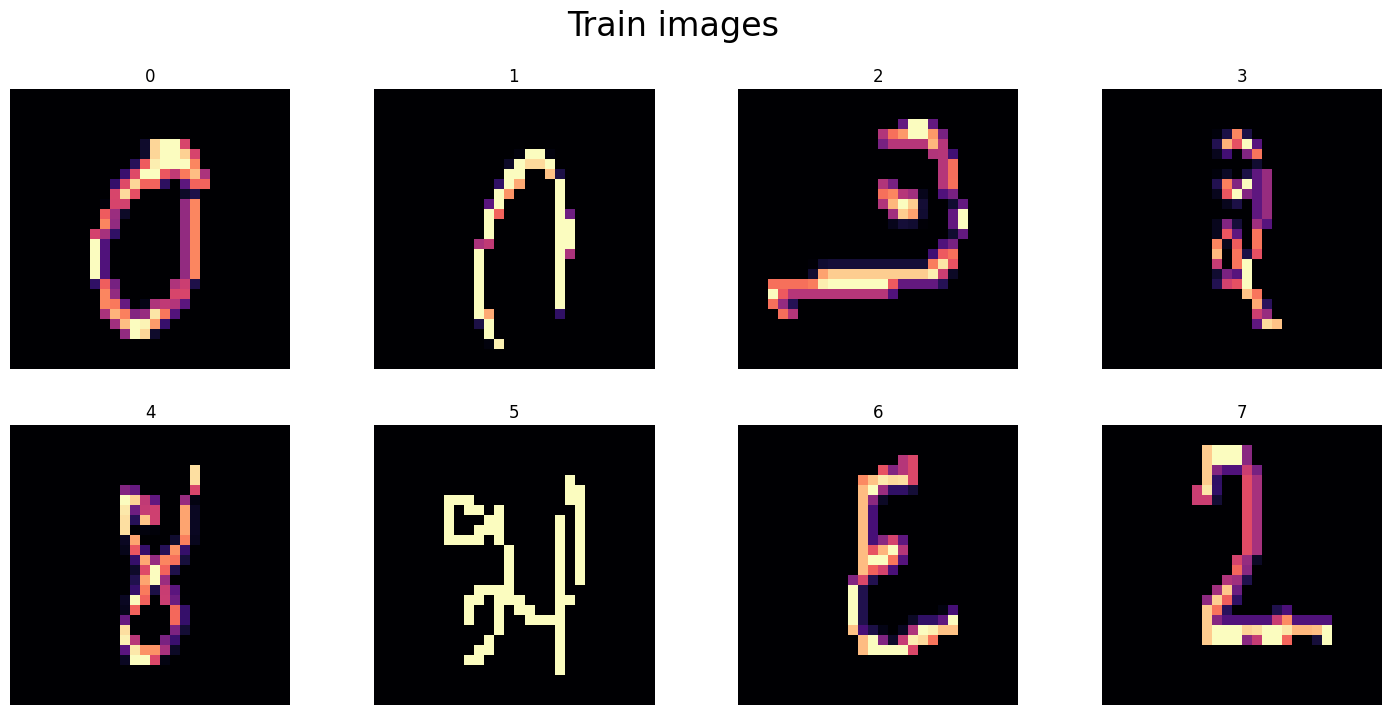

In [ ]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

> Test images doesn't have labels  
> We need to create a model to predict them

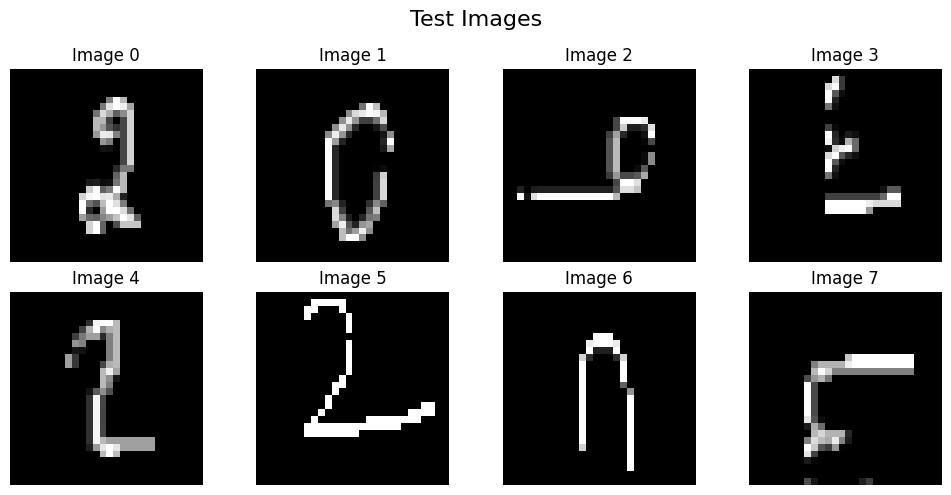

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'test' is a DataFrame with the first column as labels and the rest as image data

fig = plt.figure(figsize=(10, 5))

for ind, row in test.iloc[:8, 1:].iterrows():  # Assuming the first column is a label
    ax = plt.subplot(2, 4, ind + 1)
    img = row.to_numpy().reshape(28, 28)  # Assuming the rest of the columns represent image data
    ax.imshow(img, cmap='gray')  # Assuming the images are grayscale
    ax.set_title(f"Image {ind}")
    ax.axis('off')

plt.suptitle('Test Images', fontsize=16)
plt.tight_layout()
plt.show()


# Preprocessing

In [ ]:
# split into image and labels and convert to numpy array
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(60000, 784)
(60000,)
(5000, 785)


In [ ]:
# normalize the data
# ==================

X = X / 255.0
test = test / 255.0

In [ ]:
import numpy as np

# Assuming 'X' is the training dataset and 'test' is the testing dataset
print(X.shape)  # Shape of the training dataset
print(test.shape)  # Shape of the testing dataset

# Reshape 'X' and 'test' arrays to represent images with a shape of 28x28x1
X = X.reshape(-1, 28, 28, 1)
test = test[:, :-1].reshape(-1, 28, 28, 1)  # Excluding the last column (assuming it's a label)

# Print the new shapes of the datasets
print(X.shape)  # Updated shape of the training dataset
print(test.shape)  # Updated shape of the testing dataset


(60000, 28, 28, 1)
(5000, 785)
(60000, 28, 28, 1)
(5000, 28, 28, 1)


In [ ]:
# one hot encode target
# =====================

# shape and values of target
print(y.shape)
print(y[0])

# convert Y_train to categorical by one-hot-encoding
y_enc = to_categorical(y, num_classes = 10)

# shape and values of target
print(y_enc.shape)
print(y_enc[0])

(60000,)
0
(60000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# train test split
# ================

# random seed
random_seed = 2

# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

# shape
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


## Plot images

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


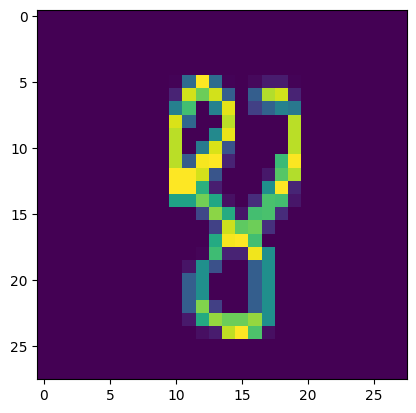

In [ ]:
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


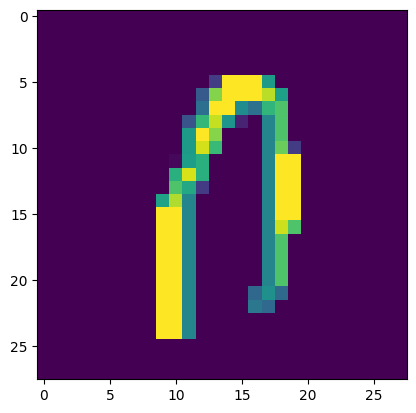

In [ ]:
g = plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

# CNN

### Model parameters

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

### Define CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Model fitting

In [ ]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
230/230 - 25s - loss: 0.3285 - accuracy: 0.8949 - val_loss: 0.0583 - val_accuracy: 0.9808 - 25s/epoch - 107ms/step
Epoch 2/10
230/230 - 24s - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0419 - val_accuracy: 0.9865 - 24s/epoch - 105ms/step
Epoch 3/10
230/230 - 25s - loss: 0.0485 - accuracy: 0.9859 - val_loss: 0.0322 - val_accuracy: 0.9900 - 25s/epoch - 107ms/step
Epoch 4/10
230/230 - 23s - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0290 - val_accuracy: 0.9904 - 23s/epoch - 99ms/step
Epoch 5/10
230/230 - 23s - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.0229 - val_accuracy: 0.9925 - 23s/epoch - 100ms/step
Epoch 6/10
230/230 - 23s - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0221 - val_accuracy: 0.9928 - 23s/epoch - 99ms/step
Epoch 7/10
230/230 - 23s - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.0213 - val_accuracy: 0.9933 - 23s/epoch - 98ms/step
Epoch 8/10
230/230 - 24s - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0227 - val_accuracy: 0.9928 - 24s/epoch - 104ms/

### Accurayc and loss

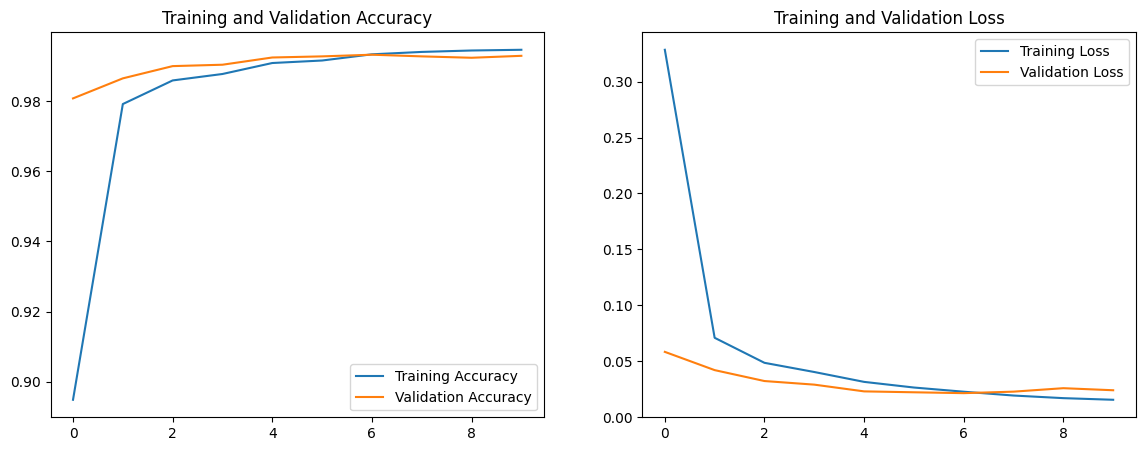

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

### Evaluating on validationa dataset

In [ ]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc, verbose=False)

[0.024719569832086563, 0.9936110973358154]

In [ ]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

563/563 [==============================] - 5s 8ms/step
[1.7291472e-11 2.4426608e-10 3.9787178e-09 1.9116925e-08 9.9999994e-01
 2.0354053e-08 2.5361313e-10 1.1399289e-08 2.4847915e-11 4.7124626e-08]
4


In [ ]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1815
           1       0.99      1.00      0.99      1828
           2       1.00      1.00      1.00      1817
           3       0.99      0.99      0.99      1785
           4       0.99      1.00      0.99      1787
           5       0.99      1.00      1.00      1769
           6       0.99      1.00      0.99      1806
           7       0.99      0.99      0.99      1769
           8       1.00      1.00      1.00      1794
           9       1.00      0.99      0.99      1830

    accuracy                           0.99     18000
   macro avg       0.99      0.99      0.99     18000
weighted avg       0.99      0.99      0.99     18000



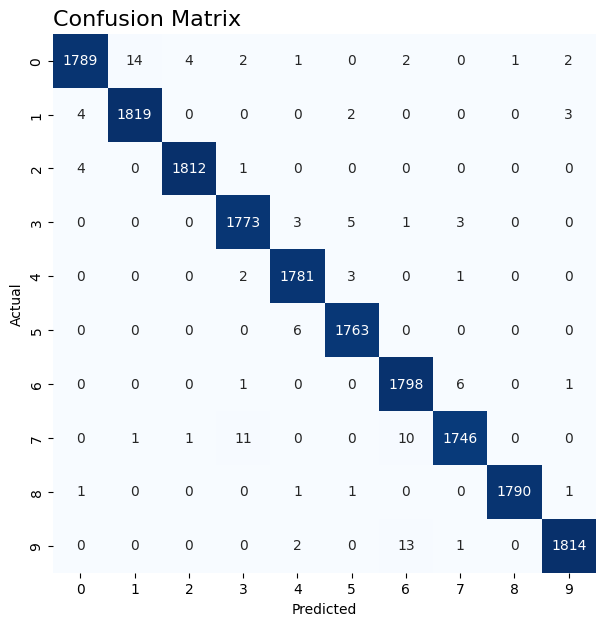

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Predicting on test

In [ ]:
# predicted values
y_pred_enc = model.predict(test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

157/157 [==============================] - 1s 8ms/step
[2.2214262e-08 7.7083897e-08 5.8583277e-07 9.9999684e-01 1.2485584e-07
 3.4204481e-07 8.0638365e-08 1.7805799e-06 9.6807753e-12 3.7109105e-09]
3


<ipython-input-33-c8a198f4d252>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


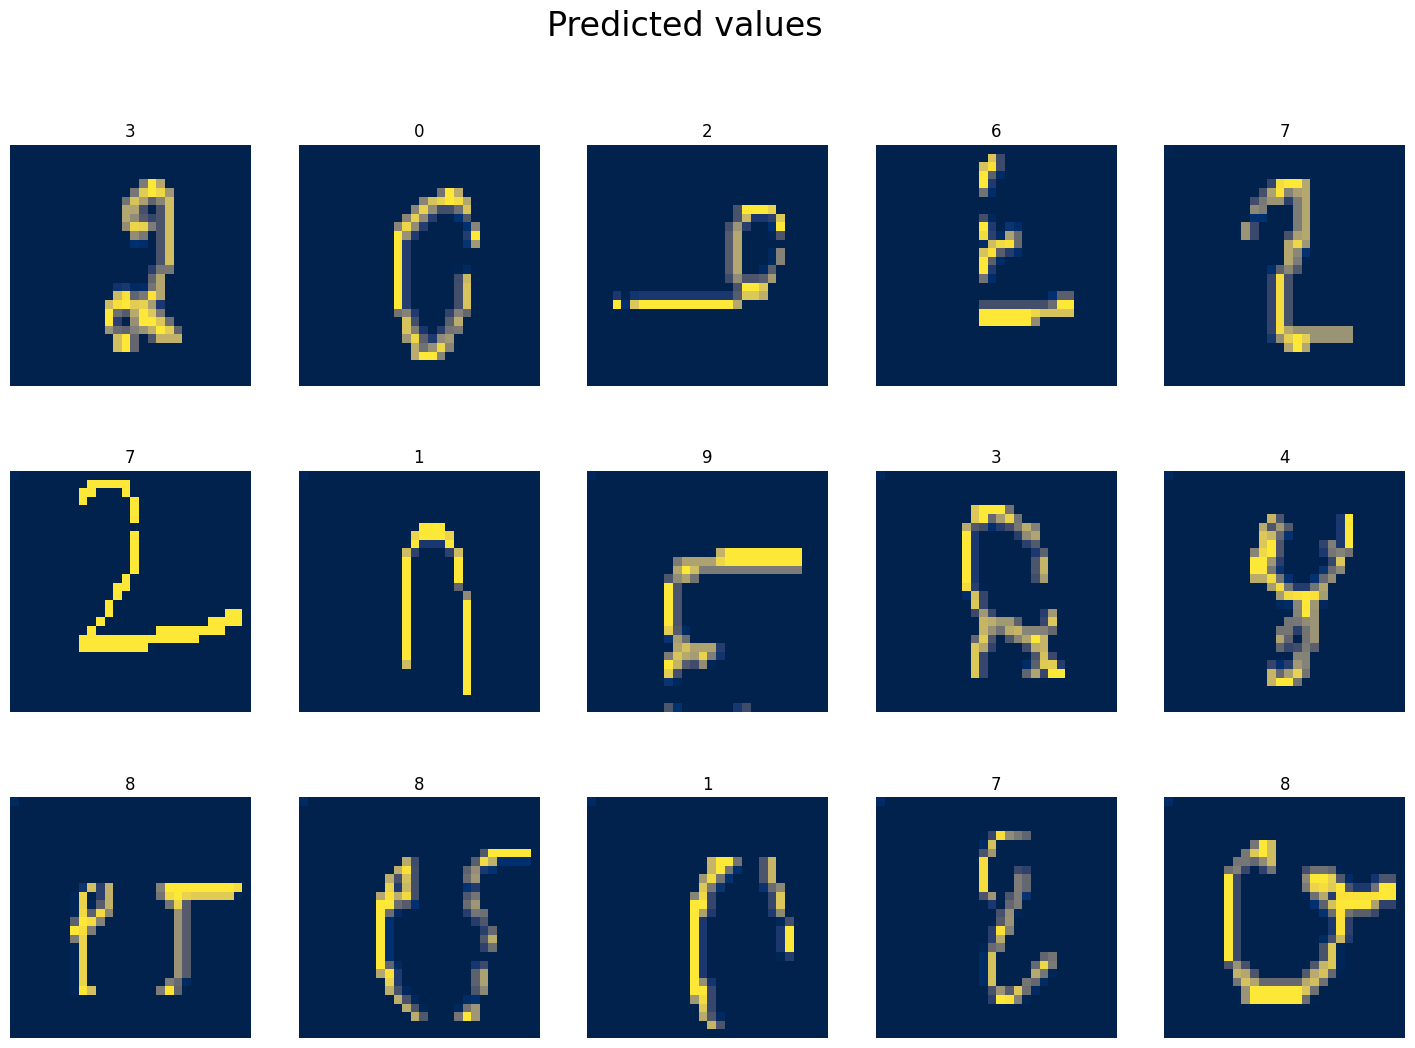

In [ ]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [ ]:
# X_train, X_val, y_train_enc, y_val_enc